In [2]:
import torch

## Understanding Tensor Broadcasting
**Tensor broadcasting** is a powerful feature in PyTorch (and other frameworks like NumPy) that allows you to perform operations on tensors of different shapes. Broadcasting simplifies arithmetic operations like addition, multiplication, and others by "stretching" smaller tensors so they have compatible shapes with the larger ones, without actually copying data. This makes the operations efficient and concise.

## Why Broadcasting is Useful
When working with tensors of different shapes, broadcasting allows you to avoid manually expanding or reshaping tensors. It’s especially useful in deep learning, where tensor operations frequently involve tensors of different dimensions (e.g., adding a vector to each row of a matrix or adding a scalar to a tensor).

## Rules of Broadcasting
To understand how broadcasting works, PyTorch follows these rules:
1. **Alignment from the Right**:
   Tensors are aligned starting from their last dimensions.
2. **Dimensions Must Match or Be 1**:
   Two dimensions are compatible if: They are equal, or One of them is 1.
3. **Expansion Without Copying**:
   If a dimension is 1, it is "stretched" or repeated to match the corresponding dimension of the other tensor. This does not involve copying data, so it is efficient.

### **Examples of Tensor Broadcasting**

In [3]:
a = torch.Tensor([1, 2, 3])
b = torch.Tensor([[1],[2],[3]])

# Broadcasting the vectors to match shapes
result = a + b
print(result) # Output will be a 3x3 matrix

tensor([[2., 3., 4.],
        [3., 4., 5.],
        [4., 5., 6.]])


###  **Adding a Scalar to a Tensor**
The scalar 10.0 is broadcasted across all elements of the 2x3 tensor. It is as if the scalar is repeated for every element of the tensor:
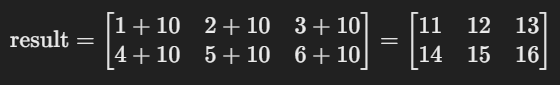

In [4]:
# Adding a Scalar to a Tensor

# A 2x3 tensor
tensor = torch.tensor([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]])

# A scalar
scalar = 10.0

# Broadcasting the scalar across the tensor
result = tensor + scalar

print(result)

tensor([[11., 12., 13.],
        [14., 15., 16.]])


###  **Adding a Vector to Each Row of a Matrix**
* The 1D vector [10.0, 20.0, 30.0] is broadcasted across each row of the matrix.
* Each element of the vector is added to the corresponding column element in every row:

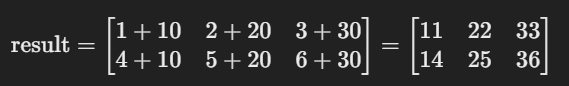

**Shape Compatibility:** 
* The matrix has shape (2, 3) and the vector has shape (3,).
* PyTorch broadcasts the vector so it matches the shape of the matrix, essentially treating it as if it were:
  
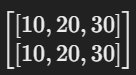

In [6]:
# Adding a Vector to Each Row of a Matrix

# A 2x3 matrix
matrix = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])

# A 1D vector of size 3
vector = torch.tensor([10.0, 20.0, 30.0])

# Broadcasting the vector to each row of the matrix
result = matrix + vector

print(result)

tensor([[11., 22., 33.],
        [14., 25., 36.]])


###  **Broadcasting with Higher Dimensions**
* The 3D tensor has a shape of (2, 1, 3) and the vector has a shape of (3,).
* The vector is broadcasted along the second dimension (1) to match the shape of the 3D tensor.
* The resulting shape is (2, 1, 3), and the vector is added element-wise.
  
 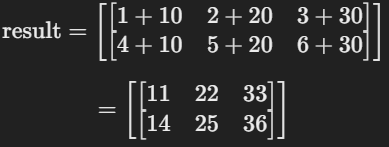

In [7]:
# Broadcasting with Higher Dimensions

# A 3D tensor of shape(2, 1, 3)
tensor_3d = torch.tensor([[[1.0, 2.0, 3.0]],[[4.0, 5.0, 6.0]]])

# A 1D vector of size 3
vector  = torch.tensor([10.0, 20.0, 30.0])

# Broadcasting the vector across the 3D tensor
result = tensor_3d + vector

print(result)

tensor([[[11., 22., 33.]],

        [[14., 25., 36.]]])


## **Broadcasting Rules Applied in Practice**

* #### **Shapes (4, 3) and (3):**
* The vector with shape (3,) can be broadcasted to match each row of the matrix with shape (4, 3). This is because the last dimension matches.
* #### **Shapes (4, 3) and (4, 1):**
* The (4, 1) tensor can be broadcasted across the second dimension to match (4, 3) because the second dimension is 1.
* #### **Shapes (2, 1, 4) and (3, 4):**
* These shapes are not compatible because when aligned from the right, the second-to-last dimensions do not match (1 vs. 3). Broadcasting will not work here.

In [11]:
# Shapes (4, 3) and (4, 1)

# A 4x3 matrix
matrix_4x3 = torch.tensor([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0],[7.0, 8.0, 9.0],[10.0, 11.0, 12.0]])

# A 4x1 matrix
matrix_4x1 = torch.tensor([[100.0],[200.0],[300.0],[400.0]])

result = matrix_4x3 + matrix_4x1

print(result)

tensor([[101., 102., 103.],
        [204., 205., 206.],
        [307., 308., 309.],
        [410., 411., 412.]])


### **Broadcasting Pitfalls and Tips**
#### **Incompatible Shapes:**
* If two tensors cannot be aligned according to the rules, PyTorch will raise a RuntimeError indicating that the shapes are incompatible.

#### **Automatic Broadcasting:**
* PyTorch automatically applies broadcasting when possible, so it’s important to be mindful of tensor shapes to avoid unexpected results.

#### **Efficient Operations:**
* Broadcasting is memory efficient because it doesn’t actually replicate the smaller tensor. Instead, it computes the result as if the smaller tensor were replicated.